# 1. Perkenalan:<br>
**Nama**<br>
Affan Anitya sebagai *Data Scientist 1*,<br>
Aqsal Herdi sebagai *Data Scientist 2*,<br>
Lia Kurniawati sebagai *Data Analyst*,<br>
Yuana Inka sebagai *Data Engineer*<br>
<br>
**Batch:** FTDS HCK-024

**Penulis Notebook:** Lia Kurniawati

## Identifikasi Masalah

### Topik Permasalahan

"Analisis Prediksi Transaki Online dan Offline Fraud untuk Meningkatkan Keamananan Transaksi dan Menjaga Likuiditas Bank"

### Latar Belakang

Fungsi utama bank adalah menghimpun dana dari masyarakat dan menyalurkannya kembali dalam bentuk pinjaman atau kredit. Selain itu, bank juga memiliki tanggung jawab besar untuk menyediakan sistem transaksi keuangan yang aman dan terpercaya, sebagai penghimpun dan penyalur dana. Transaksi keuangan merupakan aspek penting dalam kegiatan ekonomi. Keamanan dan integritas bank sangat penting untuk memastikan transaksi keuangan berjalan dengan lancar dan terhindar dari potensi kerugian.

Dengan pesatnya perkembangan teknologi dalam beberapa tahun terakhir, bank dihadapkan pada tuntutan untuk menyediakan sistem transaksi yang cepat dan efisien, baik online maupun offline. Namun, seiring kemajuan teknologi, risiko fraud atau penipuan dalam transaksi keuangan juga semakin meningkat, sehingga bank harus memastikan bahwa setiap transaksi terlindungi dengan sistem yang kuat dan dapat diandalkan.

Untuk itu, penerapan teknologi seperti machine learning dan deep learning menjadi solusi efektif untuk mendeteksi pola transaksi mencurigakan secara otomatis dan real-time. Sistem ini dapat mengirimkan alarm kepada bank jika ada indikasi fraud, memungkinkan tindakan preventif diambil segera. Selain itu, teknologi ini mempercepat proses verifikasi, mengurangi ketergantungan pada pemeriksaan manual, dan meningkatkan efisiensi operasional.

Dengan mengimplementasikan teknologi keamanan canggih ini, bank tidak hanya bisa mengurangi kerugian akibat fraud, tetapi juga menjaga reputasi, meningkatkan kepercayaan nasabah, serta memenuhi harapan mereka terhadap sistem transaksi yang aman dan cepat. Sebagai hasilnya, bank dapat memastikan likuiditas dan profitabilitas tetap terjaga, sekaligus memperkuat posisi kompetitif di pasar yang semakin berbasis digital dan teknologi.

### Tujuan Analisis

Tujuan melakukan analisis atau model machine learning transaksi fraud:
1. Mendeteksi fraud sedini mungkin, mengidentikasi pola transaksi mencurigakan sehingga dapat meningkatkan keamanan transaksi nasabah serta menjaga kepercayaan nasabah
2. Menjaga kestabilan likuiditas bank.
3. Efisiensi bank terhadap deteksi fraud yang merugikan (eksternal maupun internal).


### Penjabaran Masalah


1. Jenis transaksi apa yang paling sering terjadi fraud?
2. Bagaimana hubungan saldo awal dan saldo akhir pengirim ketika transaksi fraud terjadi?
3. Bagaimana hubungan saldo Awal dan saldo akhir penerima ketika transaksi fraud terjadi?
4. Kapan step atau waktu paling sering terjadi fraud?


### Dataset Overview

Berikut adalah penjelasan untuk setiap kolom dalam dataset balance.csv:
1. step: Waktu transaksi dalam dataset ini menggunakan jam.
2. type: Jenis transaksi yang dilakukan dalam data set ini, CASH_OUT (penarikan uang), PAYMENT (pembayaran), TRANSFER(pemindahan dana), DEBIT (uang keluar melalui ATM), CASH_IN (uang masuk)
3. amount: Jumlah uang yang terlibat dalam transaksi.
4. nameOrig: ID unik dari akun asal yang melakukan transaksi.
5. oldbalanceOrg: Saldo akun asal sebelum transaksi dilakukan.
6. newbalanceOrig: Saldo akun asal setelah transaksi dilakukan.
7. nameDest: ID unik dari akun tujuan yang menerima transaksi.
8. oldbalanceDest: Saldo akun tujuan sebelum transaksi dilakukan.
9. newbalanceDest: Saldo akun tujuan setelah transaksi dilakukan.
10. isFraud: Indikator apakah transaksi tersebut adalah fraud (0) atau bukan (1).
11. isFlaggedFraud: Indikator apakah transaksi tersebut ditandai sebagai fraud oleh sistem (1) atau tidak (0) (potensi fraud).


# 2. Import Libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Mengimpor library yang akan digunakan untuk analisis seperti pandas, numpy, matplotlib, seaborn, sklearn, dan pickle yang akan membantu atau sebagai tools dalam analisis ini.

# 3. Data Loading

In [2]:
# meloading dan membaca data
data = pd.read_csv ('onlinefraud.csv')

Melakukan loading data yang akan digunakan yaitu dataset dengan nama balance.csv yang akan digunakan pada analisis kali ini yang telah diresample agar balancing pada tahap sebelumnya.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


Membaca data secara keseluruhan melalui data.info() pada dataset balance.csv, berdasarkan visualisasi terdapat 16426 baris dan 11 kolom, data lengkap tanpa ada yang hilang. 3 kolom int64, 3 kolom object dan 5 kolom float.

In [4]:
# melihat 10 data teratas
data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


Membaca dataset secara keseluruhan dan mulai memahami untuk tiap baris dan kolomnya, melihat fitur-fitur yang ada dan mulai membaca target yang akan dituju, agar lebih jelas melihat dari 10 baris pertama.

In [5]:
# melihat 10 data terbawah
data.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.0,C1662241365,276433.18,339850.17,1,0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.00,0.00,1,0
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.00,0.00,1,0
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


Kemudian membaca dataset secara keseluruhan dan mulai memahami untuk tiap baris dan kolomnya, melihat fitur-fitur yang ada dan mulai lebih spesifik pada 10 baris terakhir.

In [6]:
# duplicate dataset

data_duplicate = data.copy()

Selanjutnya yang dilakukan adalah melakukan duplicate dataset tersebut agar data asli tetap terjaga atau terlindungi, sebelum melakukan perubahan atau pemodelan.

In [7]:
# mengecek data yang hilang
data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Tidak terlihat missing value pada dataset, maka dataset lengkap tidak ada nilai yang hilang dan siap digunakan untuk analisis selanjutnya.

In [8]:
# mengecek data duplikat
data.duplicated().sum()

0

Tidak terdapat data duplikat dalam dataset, maka dataset siap untuk dianalisis lebih lanjut.

# 4. Exploratory Data Analysis (EDA)

Berdasarkan visualisasi diatas setelah dilakukan resample dataset, kita dapat melihat bahwa antara fitur dan target sudah seimbang. Hal ini membuat analisis kita lebih baik lagi karena tidak ada lagi data yang imbalance yang dapat menyebabkan analisis menjadi bias sehingga model tidak maksimal kinerjanya.

## 1. Jenis transaksi apa yang paling sering terjadi fraud?

<Figure size 800x600 with 0 Axes>

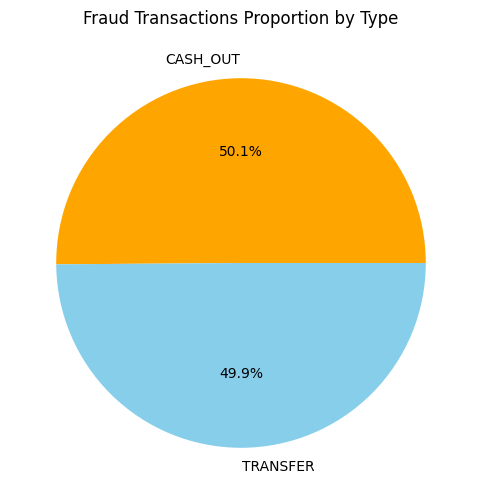

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter only fraud transactions
fraud_by_type = data[data['isFraud'] == 1]

# Count fraud occurrences by transaction type
fraud_counts_by_type = fraud_by_type['type'].value_counts()

# Plot bar chart for fraud transactions only
plt.figure(figsize=(8, 6))
# Generate a pie chart for fraud transactions by type

plt.figure(figsize=(8, 6))
fraud_counts_by_type.plot(kind='pie', autopct='%1.1f%%', colors=['orange', 'skyblue', 'green', 'red', 'purple'])
plt.title('Fraud Transactions Proportion by Type')
plt.ylabel('')  # Hide y-label for better readability
plt.show()



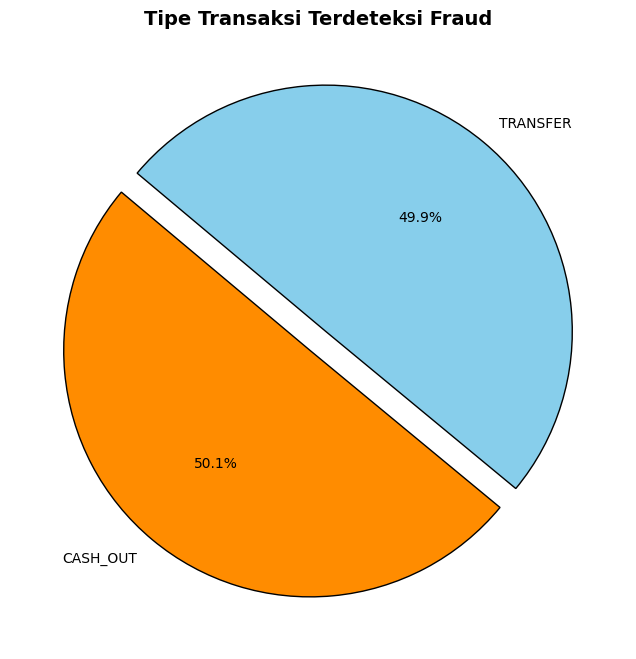

In [18]:
import matplotlib.pyplot as plt

# Define colors and explode effect for better visibility
colors = ['#FF8C00', '#87CEEB', '#32CD32', '#FF4500', '#800080']
explode = (0.05, 0.05)  # Slightly separate slices

# Create an improved pie chart
plt.figure(figsize=(8, 8))
fraud_counts_by_type.plot(kind='pie', autopct='%1.1f%%', colors=colors[:len(fraud_counts_by_type)], 
                          explode=explode, startangle=140, wedgeprops={'edgecolor': 'black'})

# Customize title and remove y-label
plt.title('Tipe Transaksi Terdeteksi Fraud', fontsize=14, fontweight='bold')
plt.ylabel('')

# Display the chart
plt.show()


Berdasarkan visualisasi diatas jenis transaksi yang sering terjadi fraud adalah transaksi cash_out dan transfer, hal ini berarti kita harus meningkatkan sistem deteksi fraud terutama ketika jumlah transfer atau cash_outnya besar. Kita perlu warning langsung dengan cara blokir atau menghubungi nasabah yang bersangkutan untuk dikonfirmasi lebih lanjut agar fraud bisa dicegah atau tidak terjadi.

## 2. Bagaimana perbandingan saldo awal dan saldo akhir pengirim ketika transaksi fraud dan tidak terjadi fraud?

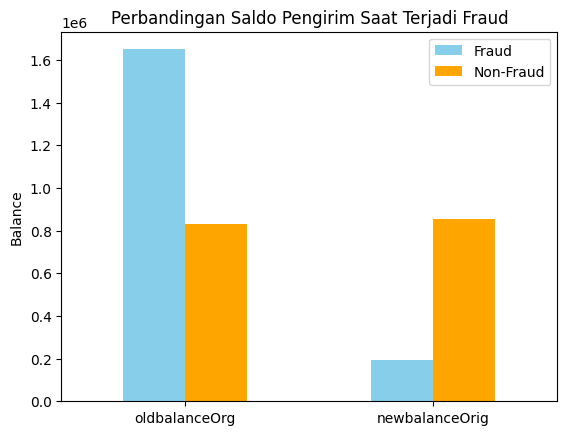

Mean of oldbalanceOrg and newbalanceOrig for Fraud Transactions:
oldbalanceOrg     1.649668e+06
newbalanceOrig    1.923926e+05
dtype: float64

Mean of oldbalanceOrg and newbalanceOrig for Non-Fraud Transactions:
oldbalanceOrg     832828.711727
newbalanceOrig    855970.228109
dtype: float64


In [16]:

# Membagi data menjadi transaksi fraud dan non-fraud
fraud_data = data[data['isFraud'] == 1]
non_fraud_data = data[data['isFraud'] == 0]

# Menghitung rata-rata oldbalanceOrg dan newbalanceOrig untuk transaksi fraud
fraud_means = fraud_data[['oldbalanceOrg', 'newbalanceOrig']].mean()

# Menghitung rata-rata oldbalanceOrg dan newbalanceOrig untuk transaksi non-fraud
non_fraud_means = non_fraud_data[['oldbalanceOrg', 'newbalanceOrig']].mean()

# Menyiapkan data untuk visualisasi
means = pd.DataFrame({
    'Fraud': fraud_means,
    'Non-Fraud': non_fraud_means
})

# Visualisasi menggunakan bar chart
means.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Perbandingan Saldo Pengirim Saat Terjadi Fraud')
plt.ylabel('Balance')
plt.xticks(rotation=0)
plt.show()

# Menampilkan hasil rata-rata untuk transaksi fraud dan non-fraud
print("Mean of oldbalanceOrg and newbalanceOrig for Fraud Transactions:")
print(fraud_means)

print("\nMean of oldbalanceOrg and newbalanceOrig for Non-Fraud Transactions:")
print(non_fraud_means)



Berdasarkan visualisasi diatas terlihat jelas bahwa ketika terjadi Fraud, saldo awal pengirim itu rata-rata jumlahnya banyak atau tinggi. Lalu setelah mereka melakukan transfer atau cash_out saldonya langsung menurun drastis atau biasanya langsung saldo minimum. Hal ini terjadi karena para tujuan pelaku fraud hanya ingin mengalirkan dananya saja atau lebih kita kenal dengan money laundry.

## 3. Bandingkan hubungan saldo awal dan saldo akhir penerima ketika transaksi fraud terjadi dan tidak terjadi fraud?

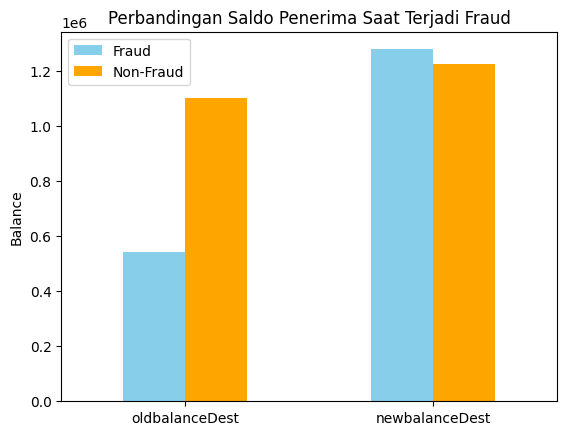

Mean of oldbalanceDest and newbalanceDest for Fraud Transactions:
oldbalanceDest    5.442496e+05
newbalanceDest    1.279708e+06
dtype: float64

Mean of oldbalanceDest and newbalanceDest for Non-Fraud Transactions:
oldbalanceDest    1.101421e+06
newbalanceDest    1.224926e+06
dtype: float64


In [17]:

# Membagi data menjadi transaksi fraud dan non-fraud
fraud_data = data[data['isFraud'] == 1]
non_fraud_data = data[data['isFraud'] == 0]

# Menghitung rata-rata oldbalanceDest dan newbalanceDest untuk transaksi fraud
fraud_dest_means = fraud_data[['oldbalanceDest', 'newbalanceDest']].mean()

# Menghitung rata-rata oldbalanceDest dan newbalanceDest untuk transaksi non-fraud
non_fraud_dest_means = non_fraud_data[['oldbalanceDest', 'newbalanceDest']].mean()

# Menyiapkan data untuk visualisasi
means = pd.DataFrame({
    'Fraud': fraud_dest_means,
    'Non-Fraud': non_fraud_dest_means
})

# Visualisasi menggunakan bar chart
means.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Perbandingan Saldo Penerima Saat Terjadi Fraud')
plt.ylabel('Balance')
plt.xticks(rotation=0)
plt.show()

# Menampilkan hasil rata-rata untuk transaksi fraud dan non-fraud pada penerima
print("Mean of oldbalanceDest and newbalanceDest for Fraud Transactions:")
print(fraud_dest_means)

print("\nMean of oldbalanceDest and newbalanceDest for Non-Fraud Transactions:")
print(non_fraud_dest_means)



Berdasarkan visualisasi diatas terlihat jelas bahwa ketika terjadi Fraud, saldo awal penerima itu rata-rata jumlahnya sedikit atau tidak banyak. Lalu setelah mereka melakukan menerima transfer atau uang masuk saldonya langsung meningkat drastis atau sangat tinggi diatas rata-rata saldo mereka pada umumnya. Hal ini terjadi karena tujuan pelaku fraud yaitu mengalirkan dana ke rekening-rekening baru atau rekening orang-orang yang mereka bayar biasanya terjadi praktik jual beli rekening. Biasanya uang tidak akan tinggal lama, akan ditransfer kembali atau dicashout.

## 4. Kapan step atau waktu paling sering terjadi fraud?

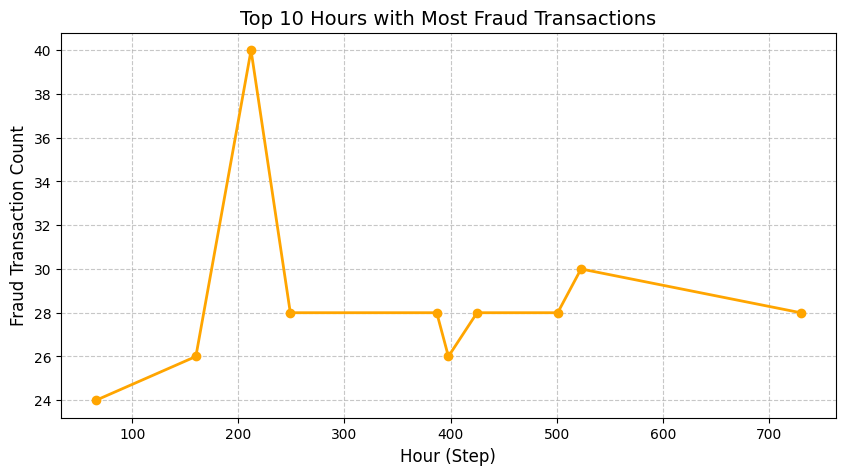

In [14]:
# Group fraud occurrences by step (hour)
step_fraud = fraud_by_type['step'].value_counts()

# Get the top 10 fraud hours
top_10_steps = step_fraud.nlargest(10).sort_index()

# Generate a line chart for top 10 fraud hours
plt.figure(figsize=(10, 5))
plt.plot(top_10_steps.index, top_10_steps.values, marker='o', linestyle='-', color='orange', linewidth=2)

# Labels and title
plt.title('Top 10 Hours with Most Fraud Transactions', fontsize=14)
plt.xlabel('Hour (Step)', fontsize=12)
plt.ylabel('Fraud Transaction Count', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the chart
plt.show()

Berdasarkan visualisasi diatas kita mencoba mengambil data 5 teratas urutan waktu atau step yang paling sering terjadi fraud, dapat kita analisis waktu terjadi fraud ini random atau bisa terjadi kapan saja dan tidak ada pola tertentu yang bisa dipelajari. Variasinya menyebar dari step awal. tengah sampai akhir dimulai dari 212, 523, 387, 425 dan 249 dan masih banyak variasi lagi. Yang perlu kita lakukan adalah mitigasi dan awas resiko transaksi setiap saat. Tidak boleh ada titik lemah, sehingga fraud bisa terdeteksi sedini mungkin.

## 5. Kesimpulan

1. Transaksi CASH_OUT dan TRANSFER adalah jenis transaksi yang paling sering terlibat dalam kasus fraud.
2. Saldo Pengirim dalam Kasus Fraud biasanya memiliki saldo awal yang cukup besar, yang langsung berkurang drastis setelah melakukan transaksi.
3. Saldo Penerima dalam Kasus Fraud umumnya memiliki saldo awal yang relatif kecil, setelah menerima dana saldo mereka langsung meningkat pesat.
4. Transaksi fraud bisa terjadi kapan saja tanpa pola waktu yang pasti, dengan variasi waktu yang tersebar dari awal hingga akhir proses transaksi (random).

## Rekomendasi Bisnis

1. Tingkat KYC (Know Your Customer), lakukan pembaruan sistem untuk mendeteksi pola transaksi online yang tidak biasa secara real-time untuk dapat mempercepat penanganan kasus fraud sedini mungkin.
2. Penerapan autentikasi tambahan (misalnya, verifikasi dua langkah atau verifikasi tambahan) untuk transaksi offline yang melibatkan penarikan dana besar atau transfer besar kepada penerima yang tidak biasa.
3. Memanfaatkan teknologi machine learning dan deep learning untuk menganalisis pola transaksi yang lebih kompleks.